# Text Classification Workflow with `arcgis.learn`

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
    <ul class="toc-item">
        <li><span><a href="#Transformer-Basics" data-toc-modified-id="Transformer-Basics-2.1">Transformer Basics</a></span></li>
        <li><span><a href="#How-to-choose-an-appropriate-model-for-your-dataset?" data-toc-modified-id="How-to-choose-an-appropriate-model-for-your-dataset?-2.2">How to choose an appropriate model for your dataset?</a></span>
    </ul>

<li><span><a href="#Supported-formats-for-labeled-training-data" data-toc-modified-id="Supported-formats-for-labeled-training-data-3">Supported formats for labeled training data</a></span></li>
    
<li><span><a href="#Imports" data-toc-modified-id="Imports-2">Imports</a></span></li>
<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3">Data preparation</a></span></li>
<li><span><a href="#TextClassifier-model" data-toc-modified-id="TextClassifier-model-4">TextClassifier model</a></span></li>
<ul class="toc-item">
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-4.1">Model training</a></span>
<li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-4.2">Validate results</a></span></li>
<li><span><a href="#Saving-the-trained-model" data-toc-modified-id="Saving-the-trained-model-4.3">Saving the trained model</a></span></li>
</ul>
<li><span><a href="#Loading-saved-model-for-inference" data-toc-modified-id="Loading-saved-model-for-inference-5">Loading saved model for inference</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li>
</ul>
</div>

# Introduction


Text classification also known as text tagging or text categorization is the process of assigning tags/labels to an unstructured text. Using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content. 

As with any other classification problem, text classification can be broadly divided into 2 different categories:

- **Multi-Class Text Classification**
- **Multi-Label Text Classification**

### Multi-Class Text Classification
For the set of problems where one can associate only a single label to a given input text falls into this category. Take an example of an house address. The address can be associated to a single country. Hence classifying/ tagging a house address to a country is an example of multi-class text clasification problem. Other examples include:
- **Sentiment Analyis** on tweets/movie reviews.
- Classifying emails as **Spam VS not Spam**
- **Language detection** from text

### Multi-Label Text Classification
For the set of problems where one can associate multiple labels to a given input text falls into this category. Take an example where we are moderating a social media platform by flagging inappropriate user comments and posts. An inappropriate posts can fall into multiple categories like toxic, threat, insult, obsene etc. Other examples include:
- **Analyze customer support tickets** to quickly assign appropriate categories.
- **Categorization of News Articles** into appropriate topics.



# Prerequisites

The `TextClassifier` class in `arcgis.learn.text` module is based on [Hugging Face Transformer](https://huggingface.co/transformers/v3.0.2/index.html) library. This library provides general purpose architectures / transformer models like BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet etc., for **Natural Language Understanding (NLU)** and **Natural Language Generation (NLG)** with over 32+ pretrained models in 100+ languages.

The transformers are the most latest and advance models that gives state of the art results for a wide range of tasks such as **text/sequence classification**, **named entity recognition (ner)**, **question answering**, **machine translation**, **text summarization**, **text generation** etc.

## Transformer Basics

Transformers in NLP are novel architectures that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. The Transformer was proposed in the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf). A transformer consists of an encoding component, a decoding component, and connections between them.

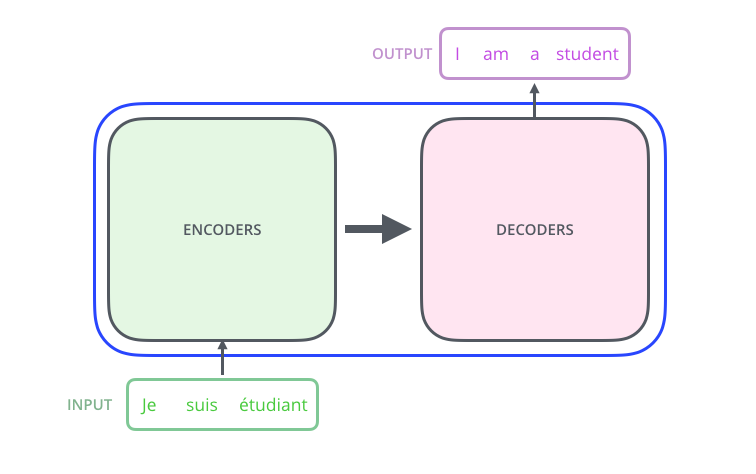

- The **Encoding component** is a stack of encoders (the paper stacks six of them on top of each other). 
- The **Decoding component** is a stack of decoders of the same number. 

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
- **Self-Attention Layer**
  - Say the following sentence is an input sentence we want to translate:
  
    **`The animal didn't cross the street because it was too tired`**
    
    What does **"it"** in this sentence refer to? Is it referring to the **street** or to the **animal**? It's a simple question to a human, but not as simple to an algorithm. When the model is processing the word **"it"**, self-attention allow the model to associate **"it"** with **"animal"**.

- **Feed Forward Layer** - The outputs of the self-attention layer are fed to a feed-forward neural network. 

The decoder has both those layers (**self-attention** & **feed forward layer**), but between them is an **attention layer** (sometimes called **encoder-decoder attention**) that helps the decoder focus on relevant parts of the input sentence.

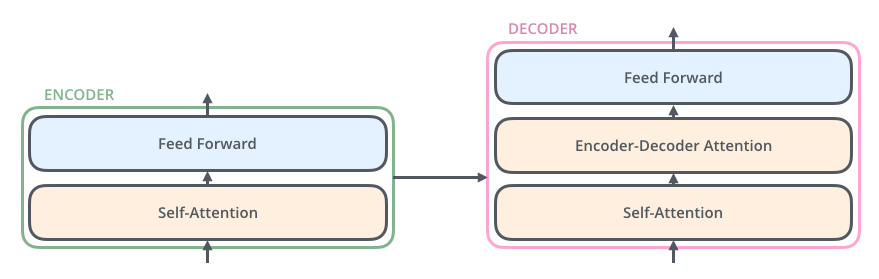

To get a more detail explaination on how attention[1] mechanism works in transformer models one can visit [this page](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). 

An **“annotated”**[2] version of the paper is also present in the form of a line-by-line implementation of the transformer architecture.

## How to choose an appropriate model for your dataset?

[This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different trasformer architectures [3] which comes in different sizes (model parameters), trained on different languages /corpus, having different attention heads etc,. Not every model can be used for `text classification` purpose. As of now, there are around 13 models which can be used to perform `text classification`. These are `BERT`[4], `RoBERTa`, `DistilBERT`, `ALBERT`, `FlauBERT`, `CamemBERT`, `XLNet`, `XLM`, `XLM-RoBERTa`, `Bart`, `ELECTRA`, `Longformer` and `MobileBERT`


Some consideration has to be made in order to pick the right transformer architecture for the problem in hand. 
- Some models like `BERT`, `RoBERTa`, `XLNET`, `XLM-RoBERTa` are highly accurate models but at the same time are larger in size. Generating inference from these models is somewhat slow.
- If one whishes to sacrifice a little accuracy over a high inferencing and training speed one can go with `DistilBERT`.
- If model size is a constraint then one can either choose `ALBERT` or `MobileBERT`. Remember the model performance will not be as great compared to models like `BERT`, `RoBERTa`, `XLNET` etc,.
- If you have a dataset in **French** language one can choose from `FlauBERT` or `CamemBERT`as these language model are trained on **French** text.
- When dealing with **long sentences/sequences** in training data one can choose from `XLNET`, `Longformer`, `Bart`.
- Some models are [multi-lingual models](https://huggingface.co/transformers/v3.0.2/multilingual.html) i.e, models trained on multiple languages. If you dataset consists of text in multiple languages you can chooses models mentioned in the above link. 
  - The models sizes of these transformer architectures are very large (in GBs). 
  - They require large momory to fine tune on a particular dataset.
  - Due to the large size of these models inferencing a fined-tuned model will be somewhat slow on CPU.

# Supported formats for labeled training data

The `TextClassifier` class in `arcgis.learn.text` module can consume labeled training data in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) or [TSV](https://en.wikipedia.org/wiki/Tab-separated_values) file format

There is a slight variation in the way the csv are created for 
- **Multi-Class Text Classification**
- **Multi-Label Text Classification**

Sample csv format for **Multi-Class Text Classification** problem

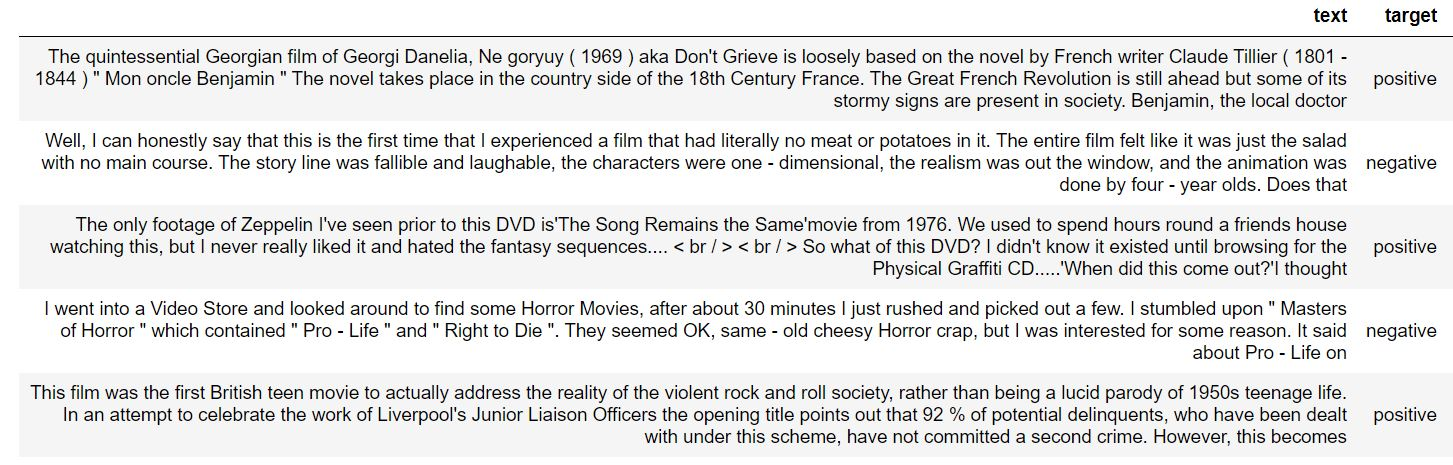


Sample csv format for **Multi-Label Text Classification** problem

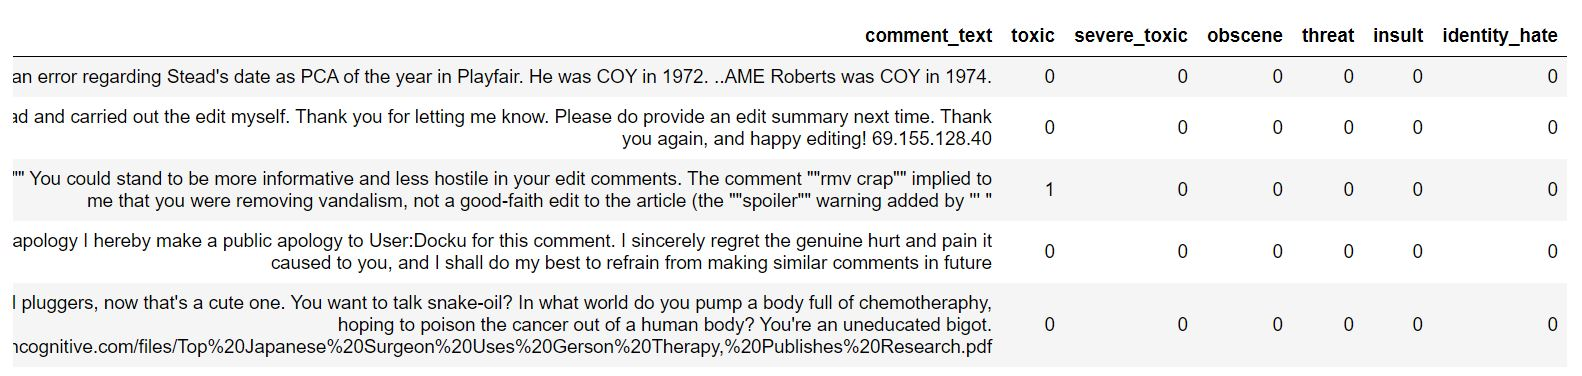


The main difference is that in **Multi-Class Text Classification** problem, we have a single target column, but in **Multi-Label Text Classification** problem we have multiple target columns to train the model. In the sample shown above a text can be assigned into 6 different categories **`toxic`**, **`severe_toxic`**, **`obscene`**, **`threat`**, **`insult`** and **`identity_hate`**. A  column value of **1** (see row #3) means that the comment/text is labelled under the column name (**toxic** in this case)

# Imports

In [1]:
import pandas as pd
from arcgis.learn import prepare_textdata
from arcgis.learn.text import TextClassifier

# Data preparation

Data preparation involves splitting the data into training and validation sets, creating the necessary data structures for loading data into the model and so on. The `prepare_textdata` function can directly read the training samples in one of the above specified formats and automate the entire process. While calling this function, user has to provide the following arguments:
- **path**  &emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;       The **full directory path** where the **training file** is present
- **task**   &nbsp;&emsp;&emsp;&emsp;- &emsp;&emsp;&emsp;&emsp;        The **task** for which the **dataset** is being prepared. Available choice at this point is **"classification"**
- **train_file** &nbsp;&ensp;&nbsp;-  &emsp;&emsp;&emsp;&emsp; The file name containing the **training data**. Supported file formats/extensions are **.csv** and **.tsv**
- **text_cols** &nbsp;&nbsp; -  &emsp;&emsp;&emsp;&emsp; The column name in the csv/tsv file that will be used as **feature**.
- **label_cols** &nbsp;-  &emsp;&emsp;&emsp;&emsp; The list of columns denoting the class label to predict. Provide a list of columns in case of multi-label classification problem

Some pre-processing functions are also provided like remoing [HTML tags](https://html.com/tags/) from the text or removing the [URLs](https://en.wikipedia.org/wiki/URL) from the text. User can decide if these pre-processing steps are required for his/her dataset or not.

In [2]:
DATA_ROOT = "/data/TextClassifier/"

In [8]:
data = prepare_textdata(DATA_ROOT, "classification", train_file="house-addresses.csv", 
                        text_cols="Address", label_cols="Country", batch_size=32)

The `show_batch()` method can be used to visualize the training samples, along with labels.

In [9]:
data.show_batch()

Address,Country
"166, Rue Grétry, 0011, 4020",BE
"91, Dalstraat, Mol, 2400",BE
"2090, ZINK RD, 2A, , GRE, OH, 45324",US
"514, SNAVELY RD, RICHMOND HEIGHTS, OH, 44143",US
"170, Rue Ferrer, 6200",BE


# TextClassifier model

`TextClassifier` model in `arcgis.laern.text` is built on top of [Hugging Face Transformer](https://huggingface.co/transformers/v3.0.2/index.html) library. The model training and inferencing workflow is similar to computer vision models in `arcgis.learn`. 

### To see what transformer backbones are supported for the classification task run the below command

In [5]:
print(TextClassifier.supported_backbones)

['BERT', 'RoBERTa', 'DistilBERT', 'ALBERT', 'FlauBERT', 'CamemBERT', 'XLNet', 'XLM', 'XLM-RoBERTa', 'Bart', 'ELECTRA', 'Longformer', 'MobileBERT']


### The HuggingFace Transformer library provides a wide variety of models for each of the backbone listed above. To see the full list kindly visit [this](https://huggingface.co/transformers/pretrained_models.html) link.

- The call to `available_backbone_models` method will list out only few of the available models for each backbone. 
- This list is not exhaustive and only contain subset of the models listed in the link above. This function is created to give a general idea to the user about the available models for a given backbone.
- That being said, the `TextClassifier` module supports any model from the 13 available backbones.
- Some of the Transformer models are quite heavy due to the high number of training parameters or high number of intermediate layers. Thus large models will have large CPU/GPU memory requirements.

In [10]:
print(TextClassifier.available_backbone_models("xlm-roberta"))

('xlm-roberta-base', 'xlm-roberta-large')


### Invoke the class by passing the data and the backbone you have choosen

The dataset consists of addresses in multiple languages like Japanese, English, French, Spanish etc., hence we will use a [multi-lingual transformer backbone](https://huggingface.co/transformers/v3.0.2/multilingual.html) to train our model.

In [ ]:
model = TextClassifier(data, backbone="xlm-roberta-base")

## Model training

Training the model is an iterative process. We can train the model using its `fit()` method till the validation loss (or error rate) continues to go down with each training pass also known as epoch. This is indicative of the model learning the task.

In [12]:
model.fit(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.007878,0.466147,0.839100,0.160900,02:03
1,0.769314,0.443333,0.834000,0.166000,01:59


The training workflow of text models differs slightly with the computer vision models in `arcgis.learn` in the sense that one has to call the `unfreeze` method of the model and train again to fine tune the entire model for the dataset we wish to train the model on.

In [ ]:
model.unfreeze()

In [14]:
model.fit(epochs=4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.344626,0.196282,0.924100,0.075900,10:27
1,0.158393,0.079556,0.965700,0.034300,10:11
2,0.116656,0.062116,0.972700,0.027300,09:54
3,0.092570,0.061044,0.972600,0.027400,10:03


### Get Accuracy and Error metrics

In [15]:
model.get_accuracy_and_error_metrics()

{'accuracy': 0.9726, 'error_rate': 0.0274}

##  Validate results

Once we have the trained model, we can see the results to see how it performs.

In [16]:
model.show_results(5)

text,target,prediction
"SN, AVENIDA JOSE MARIA MORELOS Y PAVON OTE., APATZINGÁN DE LA CONSTITUCIÓN, Apatzingán, Michoacán de Ocampo",MX,MX
"906, AVENIDA JOSEFA ORTÍZ DE DOMÍNGUEZ, CIUDAD MENDOZA, Camerino Z. Mendoza, Veracruz de Ignacio de la Llave",MX,MX
"32, CIRCUITO JOSÉ MARÍA URIARTE, FRACCIONAMIENTO RANCHO ALEGRE, Tlajomulco de Zúñiga, Jalisco",MX,MX
"SN, ESTRADA SP 250 SENTIDO GRAMADAO, LADO DIREITO FAZENDA SAO RAFAEL CASA 4, São Miguel Arcanjo, SP, 18230-000",BR,BR
"SN, CALLE JOSEFA ORTÍZ DE DOMÍNGUEZ, RINCÓN DE BUENA VISTA, Omealca, Veracruz de Ignacio de la Llave",MX,MX


### Test the model prediction on an input text

In [18]:
text = """1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319"""
print(model.predict(text))

('1016, 8A, CL RICARDO LEON - SANTA ANA (CARTAGENA), 30319', 'ES', 0.9999974966049194)


##  Saving the trained model

Once you are satisfied with the model, you can save it using the `save()` method. This creates an Esri Model Definition (EMD file) that can be used for inferencing on unseen data. 

In [19]:
model.save("country-classifier")

Computing model metrics...


WindowsPath('models/country-classifier')

# Loading saved model for inference

The trained model can be used to classify new text documents using the `predict` method. This method accepts a string or a list of strings to predict the labels of these new documents/text.

In [ ]:
inference_model = TextClassifier.from_model("/data/TextClassifier/models/country-classifier/country-classifier.emd")

In [26]:
text_list = data._train_df.sample(15).Address.values
result = inference_model.predict(text_list)

df = pd.DataFrame(result, columns=["Address", "CountryCode", "Confidence"])

df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
        .set_properties(**{'text-align': "left"}).hide_index()

Address,CountryCode,Confidence
"10-10, 中央町",JP,1.000000
"370, GROVEHURST CV, LAWRENCEVILLE, GA, 30045",US,0.962915
"5029, 34 ST, 312",CA,0.765190
"22, CL NTRA SRA CARMEN, 28770",ES,1.000000
"36, RUA LEOPOLDO MIGUEZ, APARTAMENTO 201, Rio de Janeiro, RJ, 22060-020",BR,1.000000
"355, FISHER MILLS RD, 97",CA,0.768037
"1321, Waterford Drive, EDISON, 08817",US,0.999699
"4696-6, 有馬町",JP,1.000000
"Kimberley, Sol Plaatjie",ZA,0.955045
"25, Rue Joseph Brand, ET01, 1030",BE,0.999999


# References

[1] [Attention and its Different Forms](https://towardsdatascience.com/attention-and-its-different-forms-7fc3674d14dc)

[2] [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

[3] [Summary of the models](https://huggingface.co/transformers/summary.html)

[4] [BERT Paper](https://arxiv.org/pdf/1810.04805.pdf)